Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
#common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading file
df = pd.read_excel(r"C:\Users\Siddhant Sonawane\Downloads\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
#describe
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
#checking null values
df.isna().sum()

Month         0
Passengers    0
dtype: int64

*No null values present in the data.

In [6]:
#checking duplicates
df.duplicated().sum()

0

*No null values present in the data

<AxesSubplot:>

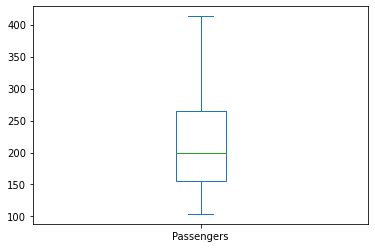

In [7]:
#checking outliers
df.plot(kind='box')

*No outliers present in the data

In [8]:
#changing name of column
df = df.rename({'Month':'Date'},axis=1)
df.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [9]:
#feature extraction
df['Month'] = df.Date.dt.strftime("%b") #month extraction
df['Year'] = df.Date.dt.strftime("%Y")  #year extraction
df

,Date,Passengers,Month,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


### Data Visualization 

<AxesSubplot:xlabel='Month', ylabel='Year'>

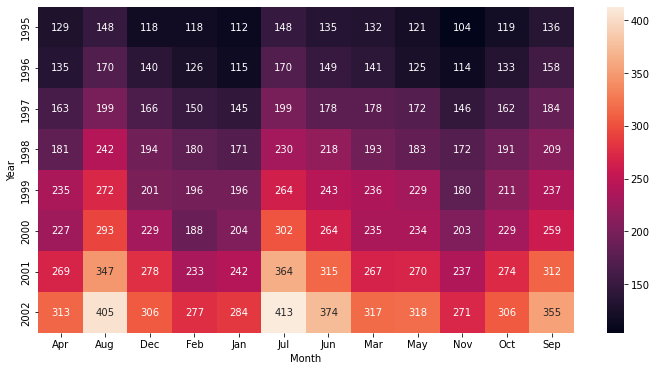

In [10]:
plt.figure(figsize=(12,6))
heatmap_y_month = pd.pivot_table(data=df,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

<AxesSubplot:>

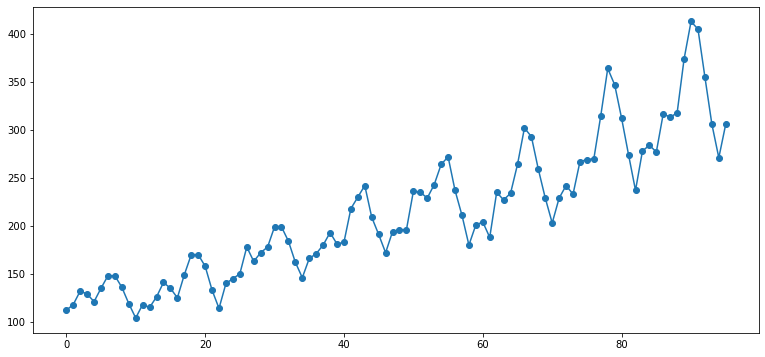

In [11]:
#plotting 
plt.figure(figsize=(13,6))
df.Passengers.plot(marker='o')

*From the above we can see that our data has upward trend and also has high peaks which might be because of some sort of seasonality.Also our data is non-stationary.

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

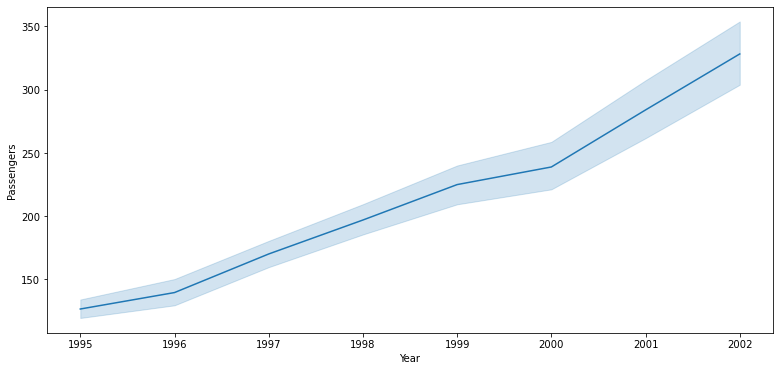

In [12]:
#plotting passengers with respect to years
plt.figure(figsize=(13,6))
sns.lineplot(x='Year',y='Passengers',data=df,markers='o')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

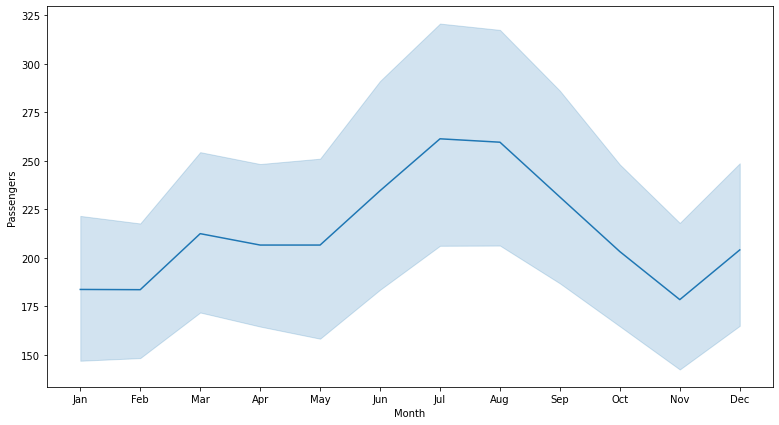

In [13]:
#plotting Passengers with respect to month
plt.figure(figsize=(13,7))
sns.lineplot(x='Month',y='Passengers',data=df,markers='o')

From the above graph we can see that most of the passengers prefer to travel in july and August month.

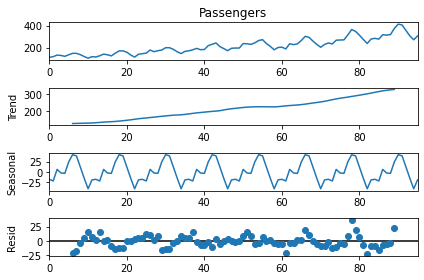

In [14]:
#decomposition of series
from statsmodels.tsa.seasonal import seasonal_decompose
de_series = seasonal_decompose(df.Passengers,period=12)
de_series.plot()
plt.show()

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

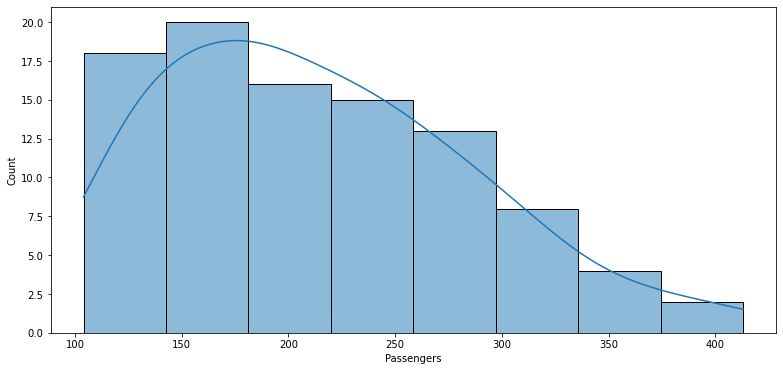

In [15]:
#histogram
plt.figure(figsize=(13,6))
sns.histplot(df['Passengers'],kde=True)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

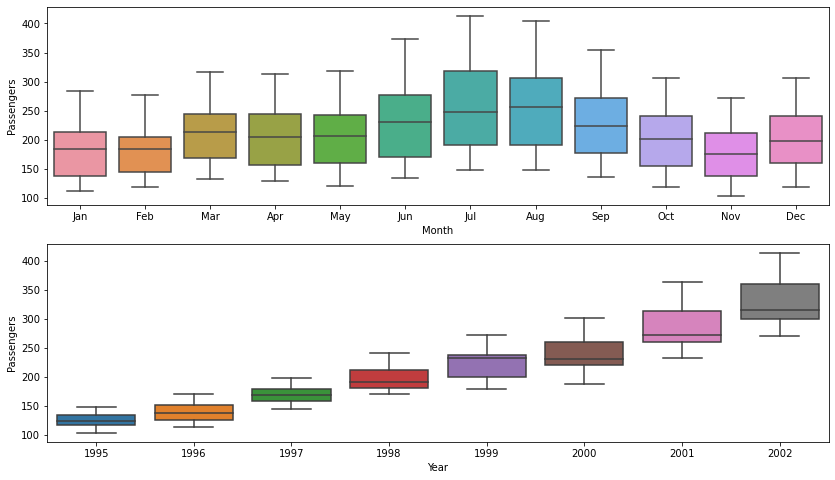

In [16]:
#boxplot
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x='Month',y='Passengers',data=df)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers',data=df)

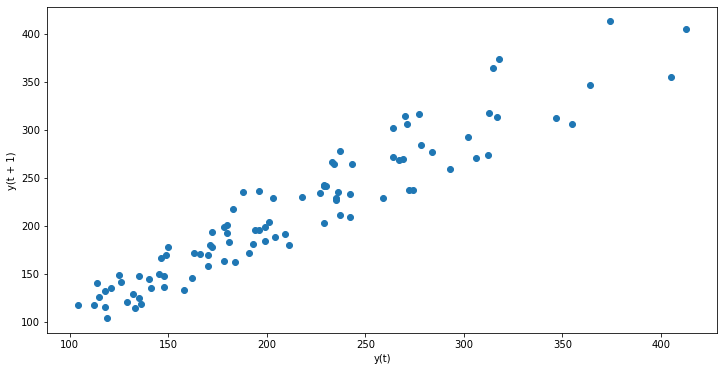

In [17]:
#lag plot #to check colinearity
from pandas.plotting import lag_plot
plt.figure(figsize=(12,6))
lag_plot(df.Passengers)
plt.show()

From the above plot it is clear that data points has linear relationship with its lagged data points. autocorrelation is present in the data. as the linear relation is in the postive direction,positive autocorrelation present in the data.

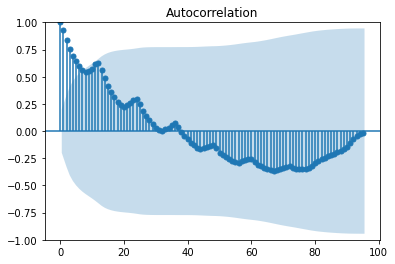

<Figure size 864x432 with 0 Axes>

In [18]:
#Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=df.Passengers,lags=95,title='Autocorrelation')
plt.figure(figsize=(12,6))
plt.show()

In [19]:
df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

*** We dont need to use upsampling method here,as the data consist of all the months.

In [20]:
df['t'] = np.arange(1,97)
df['t_square'] = df['t']*df['t']
df.head()

,Date,Passengers,Month,Year,t,t_square
0,1995-01-01,112,Jan,1995,1,1
1,1995-02-01,118,Feb,1995,2,4
2,1995-03-01,132,Mar,1995,3,9
3,1995-04-01,129,Apr,1995,4,16
4,1995-05-01,121,May,1995,5,25


In [21]:
#dummies columns for month
df = pd.get_dummies(df,columns=['Month'])
df.head()

,Date,Passengers,Year,t,t_square,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1995-01-01,112,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
#log-Passengers
df['log_Passengers']=np.log(df['Passengers'])
df.head()

,Date,Passengers,Year,t,t_square,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,log_Passengers
0,1995-01-01,112,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0,4.882802
3,1995-04-01,129,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0,4.795791


#### Splitting data into train and test

In [23]:
size = 67
train = df.iloc[:size]
test = df.iloc[size:]

In [24]:
train

,Date,Passengers,Year,t,t_square,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,log_Passengers
0,1995-01-01,112,1995,1,1,0,0,0,0,1,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,1995,2,4,0,0,0,1,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,1995,3,9,0,0,0,0,0,0,0,1,0,0,0,0,4.882802
3,1995-04-01,129,1995,4,16,1,0,0,0,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,1995,5,25,0,0,0,0,0,0,0,0,1,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2000-03-01,235,2000,63,3969,0,0,0,0,0,0,0,1,0,0,0,0,5.459586
63,2000-04-01,227,2000,64,4096,1,0,0,0,0,0,0,0,0,0,0,0,5.424950
64,2000-05-01,234,2000,65,4225,0,0,0,0,0,0,0,0,1,0,0,0,5.455321
65,2000-06-01,264,2000,66,4356,0,0,0,0,0,0,1,0,0,0,0,0,5.575949


In [25]:
test

,Date,Passengers,Year,t,t_square,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,log_Passengers
67,2000-08-01,293,2000,68,4624,0,1,0,0,0,0,0,0,0,0,0,0,5.680173
68,2000-09-01,259,2000,69,4761,0,0,0,0,0,0,0,0,0,0,0,1,5.556828
69,2000-10-01,229,2000,70,4900,0,0,0,0,0,0,0,0,0,0,1,0,5.433722
70,2000-11-01,203,2000,71,5041,0,0,0,0,0,0,0,0,0,1,0,0,5.313206
71,2000-12-01,229,2000,72,5184,0,0,1,0,0,0,0,0,0,0,0,0,5.433722
72,2001-01-01,242,2001,73,5329,0,0,0,0,1,0,0,0,0,0,0,0,5.488938
73,2001-02-01,233,2001,74,5476,0,0,0,1,0,0,0,0,0,0,0,0,5.451038
74,2001-03-01,267,2001,75,5625,0,0,0,0,0,0,0,1,0,0,0,0,5.587249
75,2001-04-01,269,2001,76,5776,1,0,0,0,0,0,0,0,0,0,0,0,5.594711
76,2001-05-01,270,2001,77,5929,0,0,0,0,0,0,0,0,1,0,0,0,5.598422


### Building Regression model

In [26]:
#importing necessary library
import statsmodels.formula.api as smf

In [27]:
#simple linear regression model
lr_model = smf.ols('Passengers~t',data=train).fit()
pred_lr = pd.Series(lr_model.predict(pd.DataFrame(test['t'])))
rmse_lr = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_lr))**2))
rmse_lr

47.5625170422922

In [28]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     202.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.21e-21
Time:                        14:15:51   Log-Likelihood:                -303.21
No. Observations:                  67   AIC:                             610.4
Df Residuals:                      65   BIC:                             614.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.1058      5.606     19.464      0.000      97.911     120.301
t              2.0395      0.143     14.231      0.000       1.753       2.326
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.338
Skew:                           0.150   Prob(JB):                        0.845
Kurtosis:                       2.825   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#exponential model
log_model = smf.ols('log_Passengers~t',data=train).fit()
pred_log = pd.Series(log_model.predict(pd.DataFrame(test['t'])))
rmse_log = np.sqrt((np.mean(np.array(test['Passengers'])-np.array(pred_log))**2))
rmse_log

289.4638173172287

In [30]:
#summary
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     226.5
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           7.30e-23
Time:                        14:15:51   Log-Likelihood:                 46.938
No. Observations:                  67   AIC:                            -89.88
Df Residuals:                      65   BIC:                            -85.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7580      0.030    157.929      0.000       4.698       4.818
t              0.0116      0.001     15.052      0.000       0.010       0.013
==============================================================================
Omnibus:                        1.661   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.501
Skew:                          -0.237   Prob(JB):                        0.472
Kurtosis:                       2.441   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#linear model with Quadratic trend
quad_model = smf.ols('Passengers~t+t_square',data=train).fit()
pred_quad = pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

43.09008330172085

In [32]:
#summary
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.72e-20
Time:                        14:15:51   Log-Likelihood:                -302.97
No. Observations:                  67   AIC:                             611.9
Df Residuals:                      64   BIC:                             618.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.5625      8.604     13.198      0.000      96.374     130.751
t              1.6519      0.584      2.829      0.006       0.485       2.818
t_square       0.0057      0.008      0.685      0.496      -0.011       0.022
==============================================================================
Omnibus:                        0.131   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.197
Skew:                           0.099   Prob(JB):                        0.906
Kurtosis:                       2.824   Cond. No.                     6.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Linear model with Additive seasonality 
add_sea_model = smf.ols('Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

123.90769027309106

In [34]:
#summary
add_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.376
Date:                Sun, 15 Jan 2023   Prob (F-statistic):              0.211
Time:                        14:15:51   Log-Likelihood:                -342.46
No. Observations:                  67   AIC:                             708.9
Df Residuals:                      55   BIC:                             735.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    163.8000     19.815      8.267      0.000     124.091     203.509
Month_Jan     -6.6333     26.829     -0.247      0.806     -60.400      47.133
Month_Feb     -4.1333     26.829     -0.154      0.878     -57.900      49.633
Month_Mar     22.0333     26.829      0.821      0.415     -31.733      75.800
Month_Apr     14.5333     26.829      0.542      0.590     -39.233      68.300
Month_May     13.5333     26.829      0.504      0.616     -40.233      67.300
Month_Jun     34.0333     26.829      1.269      0.210     -19.733      87.800
Month_Jul     55.0333     26.829      2.051      0.045       1.267     108.800
Month_Aug     42.4000     28.022      1.513      0.136     -13.757      98.557
Month_Sep     21.0000     28.022      0.749      0.457     -35.157      77.157
Month_Oct     -0.6000     28.022     -0.021      0.983     -56.757      55.557
Month_Nov    -20.6000     28.022     -0.735      0.465     -76.757      35.557
==============================================================================
Omnibus:                       22.282   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.393
Skew:                           0.078   Prob(JB):                        0.111
Kurtosis:                       1.755   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# linear model with additive seasonality and linear trend
add_sea_lr_model = smf.ols('Passengers~t+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=train).fit()
pred_add_sea_lr = pd.Series(add_sea_lr_model.predict(test[['t','Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_add_sea_lr = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_lr))**2))
rmse_add_sea_lr

33.3510240955654

In [36]:
#summary
add_sea_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     91.74
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.95e-31
Time:                        14:15:52   Log-Likelihood:                -248.00
No. Observations:                  67   AIC:                             522.0
Df Residuals:                      54   BIC:                             550.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.0174      5.483     16.600      0.000      80.025     102.010
t              2.0217      0.069     29.183      0.000       1.883       2.161
Month_Jan      3.4754      6.621      0.525      0.602      -9.798      16.749
Month_Feb      3.9536      6.617      0.597      0.553      -9.313      17.221
Month_Mar     28.0986      6.615      4.248      0.000      14.837      41.360
Month_Apr     18.5768      6.613      2.809      0.007       5.319      31.835
Month_May     15.5551      6.612      2.353      0.022       2.299      28.811
Month_Jun     34.0333      6.612      5.148      0.000      20.778      47.289
Month_Jul     53.0116      6.612      8.018      0.000      39.756      66.268
Month_Aug     50.4870      6.911      7.305      0.000      36.631      64.343
Month_Sep     27.0652      6.909      3.918      0.000      13.214      40.916
Month_Oct      3.4435      6.907      0.499      0.620     -10.404      17.291
Month_Nov    -18.5783      6.906     -2.690      0.009     -32.424      -4.733
==============================================================================
Omnibus:                        2.036   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.348
Skew:                          -0.142   Prob(JB):                        0.510
Kurtosis:                       3.634   Cond. No.                         514.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# linear model with additive seasonality and quadratic trend
add_sea_quad_model = smf.ols('Passengers~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(test[['t','t_square','Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

28.952107827330327

In [42]:
#summary
add_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     83.95
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.49e-30
Time:                        14:18:03   Log-Likelihood:                -247.68
No. Observations:                  67   AIC:                             523.4
Df Residuals:                      53   BIC:                             554.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.5352      6.542     14.298      0.000      80.414     106.656
t              1.8236      0.286      6.368      0.000       1.249       2.398
t_square       0.0029      0.004      0.713      0.479      -0.005       0.011
Month_Jan      3.0761      6.674      0.461      0.647     -10.311      16.463
Month_Feb      3.5690      6.669      0.535      0.595      -9.808      16.946
Month_Mar     27.7226      6.666      4.159      0.000      14.352      41.093
Month_Apr     18.2038      6.664      2.732      0.009       4.838      31.570
Month_May     15.1791      6.663      2.278      0.027       1.815      28.543
Month_Jun     33.6487      6.664      5.050      0.000      20.283      47.014
Month_Jul     52.6124      6.666      7.893      0.000      39.243      65.982
Month_Aug     50.4870      6.943      7.272      0.000      36.562      64.412
Month_Sep     27.0740      6.940      3.901      0.000      13.154      40.994
Month_Oct      3.4551      6.939      0.498      0.621     -10.462      17.372
Month_Nov    -18.5695      6.937     -2.677      0.010     -32.484      -4.655
==============================================================================
Omnibus:                        3.441   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.718
Skew:                          -0.307   Prob(JB):                        0.257
Kurtosis:                       3.773   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Multiplicative Seasonality
Mul_sea_model = smf.ols('log_Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea_model.predict(test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

128.175282766898

In [44]:
#summary
Mul_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.296
Date:                Sun, 15 Jan 2023   Prob (F-statistic):              0.251
Time:                        14:23:44   Log-Likelihood:                 4.3844
No. Observations:                  67   AIC:                             15.23
Df Residuals:                      55   BIC:                             41.69
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0791      0.112     45.402      0.000       4.855       5.303
Month_Jan     -0.0494      0.151     -0.326      0.745      -0.353       0.254
Month_Feb     -0.0249      0.151     -0.164      0.870      -0.328       0.279
Month_Mar      0.1208      0.151      0.798      0.429      -0.183       0.424
Month_Apr      0.0779      0.151      0.514      0.609      -0.226       0.381
Month_May      0.0659      0.151      0.435      0.665      -0.238       0.369
Month_Jun      0.1783      0.151      1.177      0.244      -0.125       0.482
Month_Jul      0.2794      0.151      1.844      0.071      -0.024       0.583
Month_Aug      0.2251      0.158      1.423      0.160      -0.092       0.542
Month_Sep      0.1210      0.158      0.765      0.448      -0.196       0.438
Month_Oct     -0.0069      0.158     -0.043      0.966      -0.324       0.310
Month_Nov     -0.1382      0.158     -0.873      0.386      -0.455       0.179
==============================================================================
Omnibus:                       55.707   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.969
Skew:                          -0.130   Prob(JB):                       0.0506
Kurtosis:                       1.561   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Multiplicative Seasonality with linear trend
Mul_sea_lr_model = smf.ols('log_Passengers~t+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = train).fit()
pred_Mult_sea_lr = pd.Series(Mul_sea_lr_model.predict(test[['t','Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_Mult_sea_lr = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea_lr)))**2))
rmse_Mult_sea_lr

12.476147646576171

In [46]:
#summary
Mul_sea_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.53e-35
Time:                        14:26:47   Log-Likelihood:                 109.72
No. Observations:                  67   AIC:                            -193.4
Df Residuals:                      54   BIC:                            -164.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6646      0.026    177.252      0.000       4.612       4.717
t              0.0115      0.000     34.629      0.000       0.011       0.012
Month_Jan      0.0082      0.032      0.257      0.798      -0.056       0.072
Month_Feb      0.0211      0.032      0.666      0.508      -0.043       0.085
Month_Mar      0.1554      0.032      4.893      0.000       0.092       0.219
Month_Apr      0.1009      0.032      3.179      0.002       0.037       0.165
Month_May      0.0774      0.032      2.440      0.018       0.014       0.141
Month_Jun      0.1783      0.032      5.620      0.000       0.115       0.242
Month_Jul      0.2679      0.032      8.440      0.000       0.204       0.331
Month_Aug      0.2712      0.033      8.175      0.000       0.205       0.338
Month_Sep      0.1556      0.033      4.691      0.000       0.089       0.222
Month_Oct      0.0162      0.033      0.488      0.628      -0.050       0.083
Month_Nov     -0.1267      0.033     -3.821      0.000      -0.193      -0.060
==============================================================================
Omnibus:                        7.701   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.272
Skew:                          -0.632   Prob(JB):                       0.0264
Kurtosis:                       4.003   Cond. No.                         514.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Multiplicative Seasonality with quadratic trend
Mul_sea_quad_model = smf.ols('log_Passengers~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = train).fit()
pred_Mult_sea_quad = pd.Series(Mul_sea_quad_model.predict(test[['t','t_square','Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov']]))
rmse_Mult_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea_quad)))**2))
rmse_Mult_sea_quad

26.752802338605658

In [50]:
#summary
Mul_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.92e-35
Time:                        14:31:16   Log-Likelihood:                 112.74
No. Observations:                  67   AIC:                            -197.5
Df Residuals:                      53   BIC:                            -166.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6282      0.030    153.448      0.000       4.568       4.689
t              0.0144      0.001     10.887      0.000       0.012       0.017
t_square   -4.205e-05   1.88e-05     -2.233      0.030   -7.98e-05   -4.28e-06
Month_Jan      0.0139      0.031      0.452      0.653      -0.048       0.076
Month_Feb      0.0267      0.031      0.868      0.389      -0.035       0.088
Month_Mar      0.1608      0.031      5.231      0.000       0.099       0.222
Month_Apr      0.1063      0.031      3.460      0.001       0.045       0.168
Month_May      0.0829      0.031      2.697      0.009       0.021       0.144
Month_Jun      0.1839      0.031      5.985      0.000       0.122       0.245
Month_Jul      0.2736      0.031      8.903      0.000       0.212       0.335
Month_Aug      0.2712      0.032      8.471      0.000       0.207       0.335
Month_Sep      0.1554      0.032      4.858      0.000       0.091       0.220
Month_Oct      0.0160      0.032      0.500      0.619      -0.048       0.080
Month_Nov     -0.1268      0.032     -3.964      0.000      -0.191      -0.063
==============================================================================
Omnibus:                        5.718   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.983
Skew:                          -0.513   Prob(JB):                       0.0828
Kurtosis:                       3.855   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#rmse result
data={'Model':pd.Series(['lr_model','exp_model','Quad_model','add_sea_model','add_sea_lr_model','add_sea_quad_model','Mul_sea_model','Mul_sea_lr_model','Mul_sea_quad_model']),'Rmse_values':pd.Series([rmse_lr,rmse_log,rmse_quad,rmse_add_sea,rmse_add_sea_lr,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_lr,rmse_Mult_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,Rmse_values
0,lr_model,47.562517
1,exp_model,289.463817
2,Quad_model,43.090083
3,add_sea_model,123.907690
4,add_sea_lr_model,33.351024
5,add_sea_quad_model,28.952108
6,Mul_sea_model,128.175283
7,Mul_sea_lr_model,12.476148
8,Mul_sea_quad_model,26.752802


### Building final model on combine data 

In [54]:
final_model = smf.ols('log_Passengers~t+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov',data = df).fit()

In [55]:
#summary of final model
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_Passengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     396.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           6.90e-68
Time:                        14:39:46   Log-Likelihood:                 164.35
No. Observations:                  96   AIC:                            -302.7
Df Residuals:                      83   BIC:                            -269.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6663      0.019    244.427      0.000       4.628       4.704
t              0.0112      0.000     64.390      0.000       0.011       0.012
Month_Jan      0.0154      0.024      0.655      0.514      -0.031       0.062
Month_Feb      0.0147      0.024      0.626      0.533      -0.032       0.062
Month_Mar      0.1467      0.024      6.232      0.000       0.100       0.194
Month_Apr      0.1026      0.024      4.361      0.000       0.056       0.149
Month_May      0.0849      0.024      3.608      0.001       0.038       0.132
Month_Jun      0.1975      0.024      8.400      0.000       0.151       0.244
Month_Jul      0.2925      0.024     12.446      0.000       0.246       0.339
Month_Aug      0.2792      0.023     11.881      0.000       0.232       0.326
Month_Sep      0.1577      0.023      6.713      0.000       0.111       0.204
Month_Oct      0.0164      0.023      0.696      0.488      -0.030       0.063
Month_Nov     -0.1253      0.023     -5.336      0.000      -0.172      -0.079
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.075
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.435   Cond. No.                         699.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""